In [15]:
# Function that returns list of bow for all movies in a given set(train/dev/test) of the given file root

from collections import defaultdict

def bow_movie(root,start,end):
    bow_per_movie = [] # list of dict where each element of bow_per_movie is bow for that movie
    for i in range(start,end):
        bow = defaultdict(float)
        string = ""
        for j in range(1,len(root[i])):
            string += root[i][j].text

        tokens =string.split()
        l_tokens = map(lambda t: t.lower(), tokens)

        for token in l_tokens:
            bow[token] += 1.0
        bow_per_movie.append(bow)
    return bow_per_movie


In [16]:
# Function that returns vocab for all movies in the training set of given file root
def vocab(bow_per_movie):
    stop_words=["a","an", "and","are","as","at","be","by","for","from","has","he", "in","is","it","its","of","on","that","the","to","was","were","will","with"]
    
    vocab = defaultdict(float)
    for bow in bow_per_movie:
        for key,value in bow.iteritems():
            vocab[key] += value
            
    
    ## removing stop words from vocabulary
    for key,value in vocab.items():
        if key in stop_words:
            vocab.pop(key)
    
    
    ## removing words with frequency less than 5
    for key,value in vocab.items():
        if value < 5:
            vocab.pop(key)
    
    return vocab

In [17]:
#9999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999
# using nltk tokenizer Function that returns list of bow for all movies in a given set(train/dev/test) of the given file root

from collections import defaultdict
from nltk.tokenize import WordPunctTokenizer        # splits all punctuations into separate tokens 
word_punct_tokenizer = WordPunctTokenizer()
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from nltk import pos_tag



def bow_movie_nltk(root,start,end):
    bow_per_movie = [] # list of dict where each element of bow_per_movie is bow for that movie
    for i in range(start,end):
        bow = defaultdict(float)
        string = ""
        for j in range(1,len(root[i])):
            string += root[i][j].text

        tokens = word_punct_tokenizer.tokenize(string)
        l_tokens = map(lambda t: t.lower(), tokens)
        '''
        ### Lemmatizing using wordnetlemmatizer
        l_tokens = [wnl.lemmatize(i,j[0].lower()) if j[0].lower() in ['a','n','v'] else wnl.lemmatize(i) for i,j in pos_tag(l_tokens)]
        ###
        '''
        for token in l_tokens:
            bow[token] += 1.0
        bow_per_movie.append(bow)
    return bow_per_movie

In [18]:
#99999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999
# using nltk stop words, Function that returns vocab for all movies in the training set of given file root

from nltk.corpus import stopwords
def vocab_nltk(bow_per_movie):
    vocab = defaultdict(float)
    
    stop_words=set(stopwords.words('english'))
    
    for bow in bow_per_movie:
        for key,value in bow.iteritems():
            vocab[key] += value
       
    ## removing stop words
    for key,value in vocab.items():
        if key in stop_words:
            vocab.pop(key)
         
    ## removing infrequent words with frequency less than 5
    for key,value in vocab.items():
        if value<5:
            vocab.pop(key)
    
    return vocab

In [261]:
print len(fvec_train_to[0])
print len(fvec_dev_to[0])

56468
56468


In [19]:
# Function that returns feature vector for all movies in the given set(train/dev/test) of given file root
def fvec(bow_per_movie,vocab):
    fvec_per_movie = [] # list of lists where each element of fvec_per_movie is a feature vector for that movie

    for bow in bow_per_movie:
        fvec = []
        for key,value in vocab.iteritems():
            if key in bow:
                fvec.append(bow[key])
            else:
                fvec.append(0)

        fvec_per_movie.append(fvec)
    return fvec_per_movie


In [20]:
# Function that returns a list of target variables i.e. revenue for all movies in the given set(train/dev/test) of given file root
def true_rev(start,end,root):
    rev = []
    for i in range(start,end):
        rev.append(root[i][0].attrib['yvalue'])
    rev=np.array(rev).astype(np.float)
    return rev

# Predicting revenue in training set

In [21]:
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

def gsv(train_x,train_y):
    parameters = {'alpha':[0.00001, 10]}
    clf = GridSearchCV(linear_model.Lasso(), parameters)
    clf.fit(train_x, train_y)
    return clf

def train(train_x,train_y):
    #clf = Ridge(alpha=0.1)
    #clf=linear_model.Lasso(alpha=0.01)
    clf=DecisionTreeRegressor(max_depth=10)
    clf.fit(train_x, train_y)
    return clf

def predict(clf, test_x): 
    return clf.predict(test_x)

def cal_mae(y_hat,y):
    return np.mean(abs(y_hat-y))


In [22]:
import xml.etree.ElementTree as ET
tree = ET.parse('dataset\\movies-data-v1.0\\movies-data-v1.0\\7domains-train-dev.tl.xml')
root_traindev_to = tree.getroot()

In [23]:
bow_per_movie_train_to = bow_movie_nltk(root_traindev_to,0,1147)


In [24]:
vocab_to=vocab_nltk(bow_per_movie_train_to)


In [ ]:
fvec_train_to = fvec(bow_per_movie_train_to,vocab_to)


In [46]:
import numpy as np
true_rev_train_to = true_rev(0,1147,root_traindev_to)

In [105]:
len(vocab_to)

56606


#  Predicting revenue in development set

In [30]:
bow_per_movie_dev_to = bow_movie_nltk(root_traindev_to,1147,1464)


In [265]:
fvec_dev_to = fvec(bow_per_movie_dev_to,vocab_to)


In [47]:
true_rev_dev_to = true_rev(1147,1464,root_traindev_to)

In [258]:
trained_classifier=train(fvec_train_to,true_rev_train_to)

In [259]:
#############################
# insert prediction code here
pred_rev_dev_to = predict(trained_classifier,fvec_dev_to) 
mae_rev_dev_to= cal_mae(pred_rev_dev_to,true_rev_dev_to)
############################

print "The mean absolute error for dev set is ", mae_rev_dev_to

The mean absolute error for dev set is  8841431.56632


In [61]:
dtree_8_ = trained_classifier

dtree_    # mae=  , used nltk tokenizer and stop word list to build bow and vocab
dtree_       # mae= , used nltk tokenizer and stop word list to build bow and vocab

dtree_8_52       # mae=8.52M , used nltk tokenizer,stop word,lemmatizer list to build bow and vocab
dtree_8_34       # mae=8.34M , used nltk tokenizer,stop word,lemmatizer list to build bow and vocab
dtree_       # mae= , used nltk tokenizer,stop word,lemmatizer list to build bow and vocab
dtree_       # mae= , used nltk tokenizer,stop word,lemmatizer list to build bow and vocab



# Storing models

# Histogram showing depiction of training data

In [327]:
mean = np.mean(true_rev_train_to)
std= np.std(true_rev_train_to)
print mean
print std
print np.max(true_rev_train_to)
print np.mean(true_rev_dev_to)
print np.max(true_rev_dev_to)

7054026.0279
16137400.537
151116516.0
9296505.53943
158411483.0


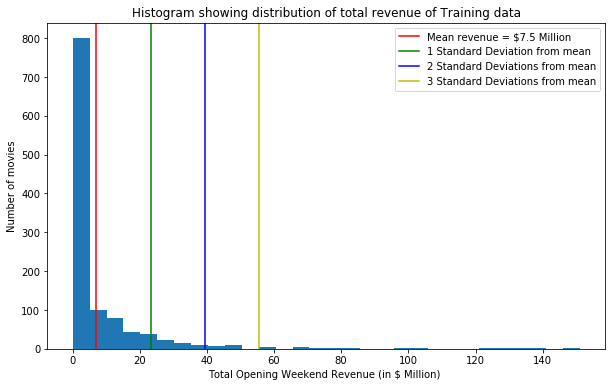

In [329]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
plt.hist(true_rev_train_to/10**6,30)
plt.xlabel("Total Opening Weekend Revenue (in $ Million) ")
plt.ylabel("Number of movies")
plt.axvline(x=mean/10**6 , c='r' , label ='Mean revenue = $7.5 Million')
plt.axvline(x=(mean+std)/10**6, c='g', label = '1 Standard Deviation from mean')
plt.axvline(x=(mean+2*std)/10**6, c='b', label = '2 Standard Deviations from mean')
plt.axvline(x=(mean+3*std)/10**6, c='y', label = '3 Standard Deviations from mean')
plt.title('Histogram showing distribution of total revenue of Training data')
plt.legend()
plt.show()

# Predicting revenue in test set

In [4]:
import xml.etree.ElementTree as ET
tree = ET.parse('dataset\\movies-data-v1.0\\movies-data-v1.0\\perscreen-7domains-train-test.tl.xml')
root_traintest_to = tree.getroot()

In [25]:
bow_per_movie_test_to = bow_movie_nltk(root_traintest_to,1147,1401)
fvec_test_to = fvec(bow_per_movie_test_to,vocab_to)
true_rev_test_to = true_rev(1147,1401,root_traintest_to)
#########################
# insert prediction code here
# pred_rev_test_to =
#########################

# Neural Network

In [278]:
f= open('C:\Users\Hope\NLP 585\project\NLP_fvec\\total rev\\fvec_train_to_nfsi.txt', 'r')
x= pickle.load(f)
g= open('C:\Users\Hope\NLP 585\project\NLP_fvec\\total rev\\fvec_dev_to_nfsi.txt', 'r')
y= pickle.load(g)
fvec_train_to_nfsi = x
fvec_dev_to_nfsi = y

In [303]:
count = 0
for h in x[0]:
    if h!=0:
        count += 1



print count,len(x[0])

672 24861


In [1]:
from sklearn.neural_network import MLPRegressor
def mpl(train_x,train_y,test_x):
    clf = MLPRegressor(hidden_layer_sizes=(100, 100,100,100),alpha=0.1)
    clf.fit(train_x, train_y) 
    return clf.predict(test_x)
def cal_mae(y_hat,y):
    return np.mean(abs(y_hat-y))

In [300]:
y_hat= mpl(x,true_rev_train_to,y)

mae= cal_mae(true_rev_dev_to,y_hat)

print "The mean absolute error for dev set is ", mae

The mean absolute error for dev set is  6099608.1598


# POS tagger based feature vector

In [1]:
import nltk

In [357]:
x = pos_tag(nltk.word_tokenize('Lord'))
print x

[('Lord', 'NN')]


In [349]:
print x

[('Lord', 'NN')]


In [315]:
[j for i,j in x]

['NNP', 'NN', 'VBZ', 'DT', 'JJ', 'NN']

In [2]:
from collections import OrderedDict
import nltk
dict_a = {'CC':0,'CD':0,'DT':0,'EX':0,'FW':0,'IN':0,'JJ':0,'JJR':0,'JJS':0,'LS':0,'MD':0,'NN':0,'NNS':0,'NNP':0,'NNPS':0,'PDT':0,'POS':0,'PRP':0,'PRP$':0,'RB':0,'RBR':0,'RBS':0,'RP':0,'SYM':0,'TO':0,'UH':0,'VB':0,'VBD':0,'VBG':0,'VBN':0,'VBP':0,'VBZ':0,'WDT':0,'WP':0,'WP$':0,'WRB':0}
ordered_tag = OrderedDict(sorted(dict_a.items(), key=lambda t: t[0]))

In [385]:
pos_tag('hellomy')

[('h', 'NN'),
 ('e', 'NN'),
 ('l', 'NN'),
 ('l', 'NN'),
 ('o', 'IN'),
 ('m', 'NN'),
 ('y', 'NN')]

In [3]:
from __future__ import division
import copy

def fvec_postag(bow_per_movie,ordered_tag):    # bow_per_movie is a list
    fvec_per_movie = [] # list of lists where each element of fvec_per_movie is a feature vector for that movie

    for bow in bow_per_movie:           # bow is a dict
        tag_dict= copy.copy(ordered_tag)
        for key,value in bow.iteritems():  

            #print pos_tag(nltk.word_tokenize(key))
            #print key,pos_tag(key)[0][1]
            temp = nltk.word_tokenize(key)
            #print pos_tag(temp)
            try:
                tag_dict[pos_tag(temp)[0][1]] += value
            except:
                pass
        fvec_per_movie.append([j/len(bow) for j in tag_dict.values()])
    return fvec_per_movie

In [29]:
fvec_postag_train = fvec_postag(bow_per_movie_train_to,ordered_tag)

In [28]:
fvec_postag_dev = fvec_postag(bow_per_movie_dev_to,ordered_tag)

In [26]:
fvec_postag_test = fvec_postag(bow_per_movie_test_to,ordered_tag)

In [35]:
fvec_postag_train_norm = fvec_postag(bow_per_movie_train_to,ordered_tag)
fvec_postag_dev_norm = fvec_postag(bow_per_movie_dev_to,ordered_tag)

In [57]:
print len(fvec_postag_train_norm[0][0]),(fvec_postag_dev_norm[0][0])

36 [89.0, 54.0, 233.0, 0, 0, 285.0, 130.0, 2.0, 7.0, 0, 31.0, 765.0, 0, 0, 162.0, 0, 0, 65.0, 31.0, 140.0, 11.0, 0, 0, 0, 43.0, 0, 50.0, 24.0, 45.0, 61.0, 5.0, 41.0, 5.0, 9.0, 3.0, 12.0]


In [28]:
import pickle

f = open('C:\Users\Hope\NLP 585\project\NLP_fvec\POS TAG\\fvec_postag_test.txt', 'w')
pickle.dump(fvec_postag_test, f)
f.close()

In [31]:
f.close()

In [34]:

f = open('fvec_postag_dev1.txt', 'w')
pickle.dump(fvec_postag_dev, f)
f.close()

In [32]:
f.close()

In [483]:
print len(fvec_postag_train)
print len(fvec_postag_train[0])

1147
36


In [11]:
import pickle
f= open('C:\Users\Hope\NLP 585\project\\fvec_postag_train.txt', 'r')
x= pickle.load(f)
g= open('C:\Users\Hope\NLP 585\project\\fvec_postag_dev.txt', 'r')
y= pickle.load(g)


In [13]:
print len(x),len(y)

1147 1147


In [496]:
# useless 26 Million error

norm_postag_train =[]
norm_postag_dev = []
for j in fvec_postag_train:
    norm_postag_train.append([i/1147 for i in j])
for j in fvec_postag_dev:
    norm_postag_dev.append([i/317 for i in j])

In [500]:
len(norm_postag_dev[0])

36

In [37]:
from sklearn.neural_network import MLPRegressor
def mpl(train_x,train_y,test_x):
    clf = MLPRegressor(hidden_layer_sizes=(300,300,300,300),alpha=0.0001)
    clf.fit(train_x, train_y) 
    return clf.predict(test_x)
def cal_mae(y_hat,y):
    return np.mean(abs(y_hat-y))

In [48]:
y_hat= mpl(fvec_postag_train_norm,true_rev_train_to,fvec_postag_dev_norm)

mae= cal_mae(true_rev_dev_to,y_hat)

print "The mean absolute error for dev set is ", mae

ValueError: Found array with dim 3. Estimator expected <= 2.